## Beer Data Analysis Assignment
In this assignment you will work with a beer data set. Please provide an answer to the questions below. Answer as many questions as possible:

1. Rank the top 3 breweries which produce the strongest beers.
2. Which year did beers enjoy the highest ratings?
3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

### Data Description

The provided compressed file BeerDataScienceProject.tar.bz2 contains data about beers and their reviews. It has the following columns:

beer_ABV = alcohol by volume

beer_beerId = beer ID

beer_brewerId = beer brewer ID

beer_name = beer name

beer_style = beer style

review_appearance = review on the beer's appearance

review_palette = review on the beer's palette (colours)

review_overall = overall beer review

review_taste = review on the beer's taste

review_profileName = profile name of the reviewer

review_aroma = review on the beer's aroma

review_text = the full text of the review

review_time = timestamp when the review was made

### Import the libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Data Preprocess

In [2]:
data = pd.read_csv("BeerDataScienceProject.tar.bz2", compression= 'bz2')

In [3]:
data.head(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [4]:
data.shape

(528870, 13)

In [5]:
data[["review_appearance", "review_palette", "review_overall", "review_taste", "review_aroma"]].describe()

,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,3.864522,3.758926,3.833197,3.765993,3.817350
std,0.604010,0.685335,0.709962,0.669018,0.718903
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.500000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [7]:
data.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [10]:
data.shape

(508358, 13)

### 1. Rank the top 3 breweries which produce the strongest beers.

In [52]:
# We don't want to difference in indices of data frames when we used group-by statement. 
# So we use reset_index() function for  perform the correct merge.

data_question_1 = data.groupby(by = ['beer_brewerId'])['beer_ABV'].mean().reset_index().sort_values(by = 'beer_ABV' ,
                                                                                                  ascending = False)
data_question_1 = data_question_1.rename(columns = {'beer_ABV' : 'mean_brewer_beerABV'})
data_question_1

,beer_brewerId,mean_brewer_beerABV
699,6513,19.228824
165,736,13.750000
1466,24215,12.466667
8,36,12.445860
789,8540,11.750000
...,...,...
1404,22698,3.200000
954,11551,2.620000
1374,21983,2.500000
1278,19144,1.375000


In [54]:
# dense: like ‘min’, but rank always increases by 1 between groups.

data_question_1['rank'] = data_question_1['mean_brewer_beerABV'].rank(method = 'dense', ascending = False)
data_question_1[data_question_1['rank'] <= 3]

,beer_brewerId,mean_brewer_beerABV,rank
699,6513,19.228824,1.0
165,736,13.750000,2.0
1466,24215,12.466667,3.0


### 2. Which year did beers enjoy the highest ratings?

In [12]:
data["review_year"] = pd.to_datetime(data["review_time"], unit="s").dt.year

### 3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [32]:
data_question_3 = data.groupby(by = 'beer_beerId')[[ 'review_overall', 'review_appearance' , 'review_palette'  , 
                                                    'review_taste' , 'review_aroma']].mean()

In [33]:
data_question_3.corr()

,review_overall,review_appearance,review_palette,review_taste,review_aroma
review_overall,1.000000,0.637923,0.766919,0.823303,0.883934
review_appearance,0.637923,1.000000,0.669632,0.682615,0.660613
review_palette,0.766919,0.669632,1.000000,0.756483,0.826141
review_taste,0.823303,0.682615,0.756483,1.000000,0.835402
review_aroma,0.883934,0.660613,0.826141,0.835402,1.000000


<AxesSubplot:>

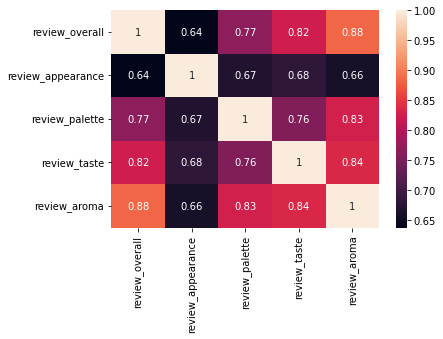

In [34]:
sns.heatmap(data_question_3.corr(), annot=True)

We want to higher correlation. As you can see , the aroma is the most important factor for the beer.